# **Introduction to Big Data**

# **Cryptocurrency Dataset**

## **Data Science & Business Analytics**

## **Student 1: 11355 | Asad Tariq Sheikh**

## **Student 2: 10718 | Muzammil Ahmed**

Dataset: https://raw.githubusercontent.com/asadsheikh1/MachineLearningPredictions/main/data.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
import warnings
warnings.filterwarnings("ignore")

# **Importing CSV**

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/asadsheikh1/MachineLearningPredictions/main/data.csv")

In [3]:
target = data['Currency']
label_to_int = {'USD': 0, 'BTC': 1, '1INCH': 2}
true_labels_int = target.map(label_to_int)

# **Reading CSV**

In [4]:
data

,Date,Open,High,Low,Close,Volume,Currency
0,18/07/2010,0.000000,0.100000,0.100000,0.100000,75,USD
1,19/07/2010,0.100000,0.100000,0.100000,0.100000,574,USD
2,20/07/2010,0.100000,0.100000,0.100000,0.100000,262,USD
3,21/07/2010,0.100000,0.100000,0.100000,0.100000,575,USD
4,22/07/2010,0.100000,0.100000,0.100000,0.100000,2160,USD
...,...,...,...,...,...,...,...
9441,18/08/2022,0.772773,0.781242,0.740515,0.740515,50099518,1INCH
9442,19/08/2022,0.740477,0.741270,0.672270,0.678480,70747875,1INCH
9443,20/08/2022,0.678521,0.700424,0.663128,0.675273,48179804,1INCH
9444,21/08/2022,0.675357,0.708230,0.674926,0.700757,42495837,1INCH


In [5]:
data.isnull().sum()

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

In [6]:
data.describe()

,Open,High,Low,Close,Volume
count,9446.000000,9446.000000,9446.000000,9446.000000,9.446000e+03
mean,7769.768488,7984.789003,7527.610018,7774.211289,2.478275e+07
std,14267.207920,14652.662788,13825.502018,14267.994066,1.725645e+08
min,0.000000,0.100000,0.000000,0.100000,0.000000e+00
25%,14.300000,15.250000,13.900000,14.300000,3.231900e+04
50%,604.700000,612.000000,592.800000,604.700000,7.453800e+04
75%,8303.900000,8547.075000,8111.000000,8332.300000,2.552735e+05
max,67528.700000,68990.600000,66334.900000,67527.900000,4.468697e+09


In [7]:
data.nunique()

Date        4420
Open        4068
High        4059
Low         4069
Close       4075
Volume      4975
Currency       3
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9446 entries, 0 to 9445
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      9446 non-null   object 
 1   Open      9446 non-null   float64
 2   High      9446 non-null   float64
 3   Low       9446 non-null   float64
 4   Close     9446 non-null   float64
 5   Volume    9446 non-null   int64  
 6   Currency  9446 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 516.7+ KB


# **Dropping Columns**

In [9]:
data = data.drop(columns=['Currency'])

In [10]:
data

,Date,Open,High,Low,Close,Volume
0,18/07/2010,0.000000,0.100000,0.100000,0.100000,75
1,19/07/2010,0.100000,0.100000,0.100000,0.100000,574
2,20/07/2010,0.100000,0.100000,0.100000,0.100000,262
3,21/07/2010,0.100000,0.100000,0.100000,0.100000,575
4,22/07/2010,0.100000,0.100000,0.100000,0.100000,2160
...,...,...,...,...,...,...
9441,18/08/2022,0.772773,0.781242,0.740515,0.740515,50099518
9442,19/08/2022,0.740477,0.741270,0.672270,0.678480,70747875
9443,20/08/2022,0.678521,0.700424,0.663128,0.675273,48179804
9444,21/08/2022,0.675357,0.708230,0.674926,0.700757,42495837


In [11]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = pd.to_numeric(data['Date'])

# **Algorithm**

# **K-Means Clustering**

# **What will be the value of k?**

We will determine the value of `k` by using `Elbow Method`

In [12]:
cluster_sum_of_square = np.empty((0,))
clusters_range = np.arange(1, 11)

for k in clusters_range:
    model = KMeans(n_clusters=k)
    model.fit(data)
    cluster_sum_of_square = np.append(cluster_sum_of_square, model.inertia_)

# **Elbow Method**

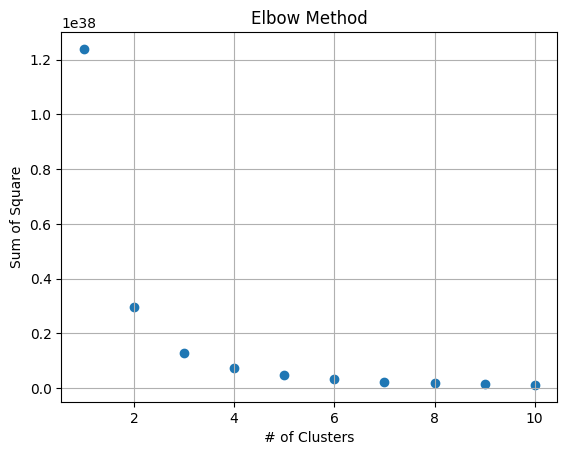

In [13]:
plt.scatter(clusters_range, cluster_sum_of_square)
plt.title('Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('Sum of Square')
plt.grid()
plt.show()

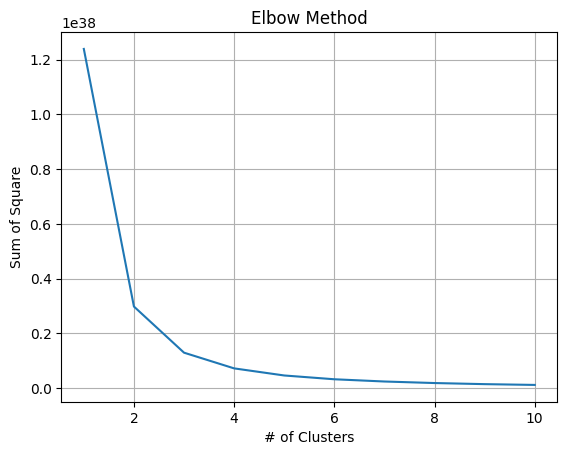

In [14]:
plt.plot(clusters_range, cluster_sum_of_square)
plt.title('Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('Sum of Square')
plt.grid()
plt.show()

So the best value would be `k = 3`.

Because we can see, after 3-Clusters `sum of square` value isn't much decreasing

# **Prediction**

We'll configure a K-Means clustering model with `3 clusters`, using `k-means++` initialization, allowing a maximum of `200` iterations per run, performing `10` initializations, and ensuring reproducibility of the initialization using a specific random seed `11`.

In [15]:
model = KMeans(n_clusters = 3, init ='k-means++', max_iter=200, n_init=10, random_state=11)

In [16]:
predictions = model.fit_predict(data)
predictions

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [17]:
x = data.values
x

array([[1.27941120e+18, 0.00000000e+00, 1.00000000e-01, 1.00000000e-01,
        1.00000000e-01, 7.50000000e+01],
       [1.27949760e+18, 1.00000000e-01, 1.00000000e-01, 1.00000000e-01,
        1.00000000e-01, 5.74000000e+02],
       [1.27958400e+18, 1.00000000e-01, 1.00000000e-01, 1.00000000e-01,
        1.00000000e-01, 2.62000000e+02],
       ...,
       [1.66095360e+18, 6.78520977e-01, 7.00424016e-01, 6.63128018e-01,
        6.75273001e-01, 4.81798040e+07],
       [1.66104000e+18, 6.75356984e-01, 7.08230019e-01, 6.74925983e-01,
        7.00757027e-01, 4.24958370e+07],
       [1.66121280e+18, 7.00450659e-01, 7.08219945e-01, 6.99547291e-01,
        7.07401931e-01, 4.91850560e+07]])

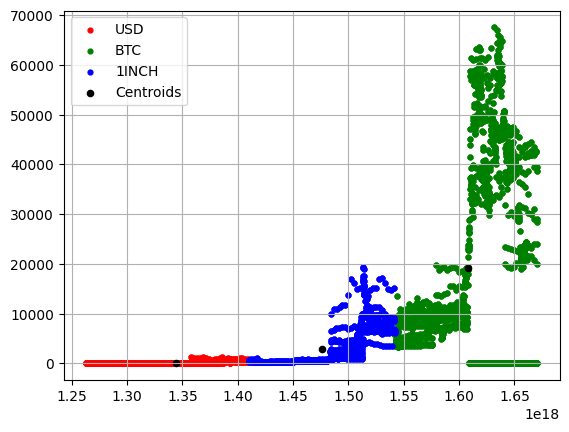

In [20]:
plt.scatter(x[predictions==0,0], x[predictions==0,1], s=12, c='red', label='USD')
plt.scatter(x[predictions==1,0], x[predictions==1,1], s=12, c='green', label='BTC')
plt.scatter(x[predictions==2,0], x[predictions==2,1], s=12, c='blue', label='1INCH')

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=20, c='black', label='Centroids')
plt.legend()
plt.grid()
plt.show()

# **Metrics**

In [21]:
ari = adjusted_rand_score(true_labels_int, predictions)
ami = adjusted_mutual_info_score(true_labels_int, predictions)

print("Adjusted Rand Index (ARI):", ari)
print("Adjusted Mutual Information (AMI):", ami)

Adjusted Rand Index (ARI): 0.010905973341002918
Adjusted Mutual Information (AMI): 0.07052406327030875


In [26]:
accuracy = (true_labels_int == predictions).sum() / len(true_labels_int)
print("Accuracy:", accuracy)

Accuracy: 0.3063730679652763
